#### Early Stage Diabetes Detection

Machine learning models can helps in early detection of diabetes. Building models(Based on SVM, & Naive Bayes) to predict whether a person had daibetes or not by Exploring data analysis, Feature selection ,Building models.

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#### Data

In [191]:
df= pd.read_csv('https://raw.githubusercontent.com/Dixit01/100daysofML/main/Naive_bayes_%26_SVM/diabetes_data.csv')
df.shape

(520, 17)

#### Exploratory Data Analysis and Visualization

In [192]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [193]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [195]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [196]:
df['class']

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object

In [197]:
df.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

#### Encoding

In [198]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
unlabled_columns = list(df.columns)[1:]
# Encode labels in column
for i,j in enumerate(unlabled_columns):
  df[j]= label_encoder.fit_transform(df[j])
 
df


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


#### Exploratory Data Analysis and Visualization

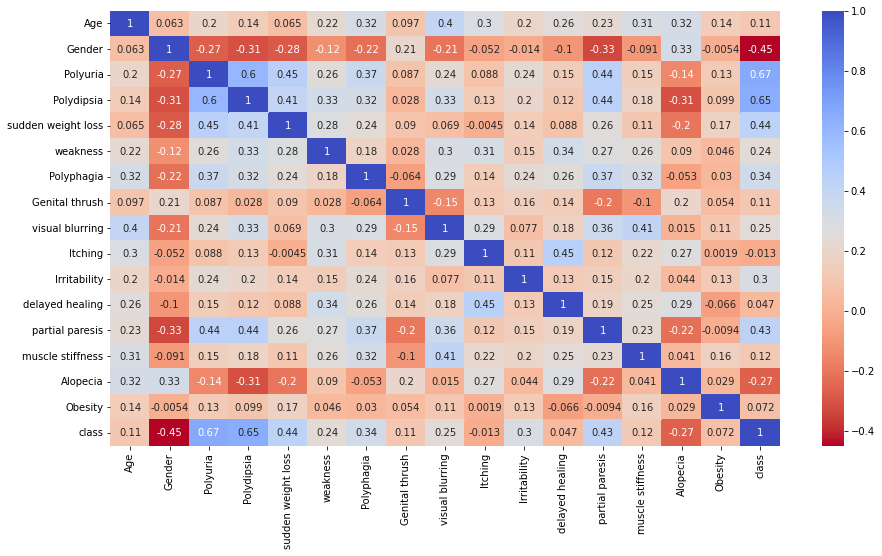

In [199]:
corrdata = df.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True,cmap="coolwarm_r")

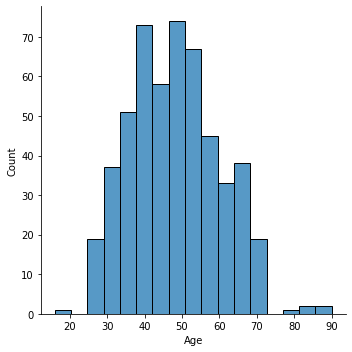

In [201]:
#Age

sns.displot(df['Age'])

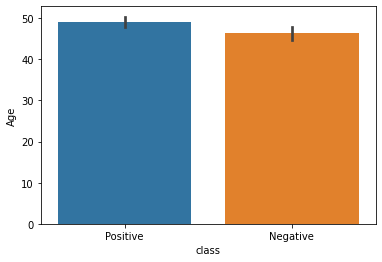

In [90]:
#Age/class(dependent variable)

sns.barplot(x='class',y='Age',data=df)

In [206]:
# class
fig = px.pie(df['class'],names='class',width=350, height=350)

fig.show()

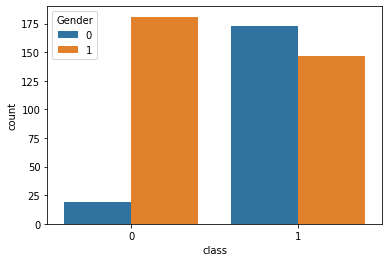

In [207]:
#Gender

sns.countplot(x='class',data=df,hue='Gender')

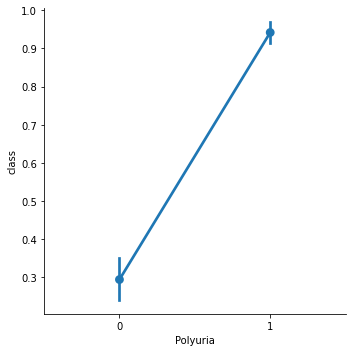

In [208]:
#Polyuria

sns.catplot(x="Polyuria", y="class", kind="point", data=df)

In [215]:
X = df[df.columns[:-1]]
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [216]:
Y = df[df.columns[-1]]
Y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

##### Feature selection using selectkbest

In [217]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X,Y)

In [231]:
df_scores = pd.DataFrame(fit.scores_)
df_cols = pd.DataFrame(X.columns)
df_scores

,0
0,18.845767
1,38.747637
2,116.184593
3,120.785515
4,57.749309
5,12.724262
6,33.198418
7,4.914009
8,18.124571
9,0.047826


In [232]:
featurescores = pd.concat([df_cols,df_scores],axis=1)
featurescores.columns=['column','scores']

In [233]:
featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


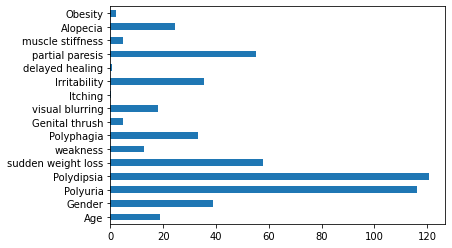

In [234]:
featureview=pd.Series(fit.scores_, index=X.columns)
featureview.plot(kind='barh')

In [235]:
featurescores.nlargest(12,'scores')

,column,scores
3,Polydipsia,120.785515
2,Polyuria,116.184593
4,sudden weight loss,57.749309
12,partial paresis,55.314286
1,Gender,38.747637
10,Irritability,35.334127
6,Polyphagia,33.198418
14,Alopecia,24.402793
0,Age,18.845767
8,visual blurring,18.124571


###### Checking the variance of each feature, Features must have high variance with other features

In [223]:
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X)


In [224]:
dataset_scores1 = pd.DataFrame(falls.variances_)
dat1 = pd.DataFrame(X.columns)

In [122]:
high_variance = pd.concat([dataset_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']
high_variance

,variance,cols
0,147.374168,Age
1,0.232899,Gender
2,0.249985,Polyuria
3,0.247304,Polydipsia
4,0.243162,sudden weight loss
5,0.242511,weakness
6,0.248044,Polyphagia
7,0.173314,Genital thrush
8,0.247304,visual blurring
9,0.249819,Itching


#### Splitting the dataset into training and testing sets

In [236]:
X1 = df[(featurescores.nlargest(12,'scores'))['column'].values]
y = df['class']

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size = 0.2,random_state=0)

##### Standardization of independant variables

In [244]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

##### Support Vector Machine Model(kernel = 'linear', 'rbf' and 'poly')

In [245]:
# kernel = 'linear'

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC

sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

prediction_1 =sv.predict(X_test)

print(accuracy_score(prediction_1,y_test))

print(confusion_matrix(prediction_1,y_test))

0.9519230769230769
[[37  2]
 [ 3 62]]


In [246]:
#kernel = 'rbf' 

svrf=SVC(kernel='rbf',random_state=0)
svrf.fit(X_train,y_train)

prediction_2 = svrf.predict(X_test)

print(accuracy_score(prediction_2,y_test))
print(confusion_matrix(prediction_2,y_test))


0.9807692307692307
[[39  1]
 [ 1 63]]


In [247]:
kernel = 'poly' 

svrf=SVC(kernel='poly',random_state=0)
svrf.fit(X_train,y_train)

prediction_3 = svrf.predict(X_test)

print(accuracy_score(prediction_3,y_test))
print(confusion_matrix(prediction_3,y_test))

0.9903846153846154
[[40  1]
 [ 0 63]]


##### Naive bayes-Gaussian NB

In [248]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

prediction4=gb.predict(X_test)

print(accuracy_score(prediction4,y_test))
print(confusion_matrix(prediction4,y_test))

0.9423076923076923
[[35  1]
 [ 5 63]]
